In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import richardsplot as rplot
import palettable
from astropy.cosmology import FlatLambdaCDM; cosmo = FlatLambdaCDM(Om0=0.3, H0=70)
from astropy.table import Table

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
plt.rcParams['xtick.top']   = True
plt.rcParams['ytick.right'] = True

#use this color palette throughout
cs = palettable.colorbrewer.qualitative.Dark2_5.mpl_colors

In [3]:
def plot_contour(xdata, ydata, c="k", mark=".", nlevels=3, ax=None, linewidths=0.5, s=3, alpha=1, label=None):
    if ax is None:
        ax = plt.gca()
    xmin, xmax = xdata.min()-0.25*abs(xdata.mean()), xdata.max()+0.25*abs(xdata.mean())
    ymin, ymax = ydata.min()-0.25*abs(ydata.mean()), ydata.max()+0.25*abs(ydata.mean())
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([xdata, ydata])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    z = kernel(values)
    
    #transform Z to a 0-1 range
    Z = (Z - Z.min())/(Z.max() - Z.min())
    z = (z - z.min())/(z.max() - z.min())
    
    #ax.contour(X, Y, Z, levels=nlevels, linewidths=1.5, colors=c)
    levels = ax.contour(X, Y, Z, levels=nlevels, linewidths=linewidths, colors=[c]).levels
    
    # mask points above density threshold
    x = np.ma.masked_where(z > levels[0], xdata)
    y = np.ma.masked_where(z > levels[0], ydata)
    ax.scatter(x, y, color=c, marker=mark, s=3, alpha=alpha, zorder=2, label=label)

---
load in HST data.  Note that (for now?) only the Sulentic+07 objects have FWHM HB and R(FeII) measured.  Although there are probably some HSLA spectra with SDSS coverage that we could include.  Check that later.

In [4]:
hst = pd.read_csv("/Users/Trevor1/Dropbox/HST/final_tables/HST_CIV_Sulentic2007_HSLA2018_1Jan2023.csv")
#comment out next line if want to include "bad" CIV measurements
hst = hst[~np.isnan(hst["Hbeta_FWHM_sul07"])]
hst

,Final_Name,Name_sul07,z,z_src,r_z_sul07,CIV_blue_tvm,CIV_EW_tvm,CIVgood_tvm,CIV_blue_sul07,CIV_EW_sul07,...,EddRatio_Source,SDSS_NAME,PLATE,MJD,FIBERID,IAU_sul07,Hbeta_FWHM_sul07,RFeII_sul07,_RA,_DE
1,LBQS1138+0204,LBQS 1138+0204,0.3821,Sul,SDSS,1024.717970,9.097499,1,536.0,33.333333,...,NaN,114121.75+014803.5,514.0,51994.0,285.0,J11413+0148,4225.0,0.92,175.340622,1.800953
2,NGC5548,NGC 5548,0.0168,Sul,M03,473.481426,367.243603,1,-309.0,197.333333,...,Spectra 1450A,NaN,NaN,NaN,NaN,J14179+2508,6143.0,0.33,214.497971,25.136792
4,J21435+1743,[HB89] 2141+175,0.2106,Sul,M03,-78.781269,19.438521,1,-309.0,17.449664,...,NaN,NaN,NaN,NaN,NaN,J21435+1743,5298.0,0.33,325.898125,17.730221
7,PG0003+158,PG 0003+158,0.4504,Sul,M03,-9.680667,54.260897,1,-35.0,88.932806,...,NaN,NaN,NaN,NaN,NaN,J00059+1609,5519.0,0.14,1.496807,16.163607
9,3C110,3C 110,0.7744,Sul,SPM,-493.636575,59.969524,1,-983.0,80.198020,...,NaN,NaN,NaN,NaN,NaN,J04172-0553,9256.0,0.55,64.319917,-5.896000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,QSO-003916-511701,[WPV85] 007,0.0290,Sul,G99,1162.377056,20.602972,1,78.0,100.000000,...,NaN,NaN,NaN,NaN,NaN,J00392-5117,1203.0,0.68,9.815950,-51.283700
194,J08535+4349,[HB89] 0850+440,0.5149,Sul,M03,1093.547513,42.234455,1,1345.0,51.898734,...,NaN,085334.23+434902.3,8281.0,57042.0,160.0,J08535+4349,2724.0,0.23,133.392651,43.817231
195,NGC1566,NGC 1566,0.0051,Sul,ESO,-701.286883,114.347873,0,-993.0,105.555556,...,NaN,NaN,NaN,NaN,NaN,J04200-5456,5967.0,0.05,65.001746,-54.937808
201,NGC-3516,NGC 3516,0.0088,Sul,K96,-78.781269,153.396599,1,-68.0,212.500000,...,Spectra 1450A,NaN,NaN,NaN,NaN,J11067+7234,6338.0,0.36,166.697892,72.568528


In [5]:
Hb_fwhm_hst = hst["Hbeta_FWHM_sul07"].values
RFeII_hst   = hst["RFeII_sul07"].values

In [6]:
maskMBH = (~np.isnan(hst["log M_BH"].values))

---
Next load SDSS.  Since (for now) we're looking at DR14 quasars in the CIV plot, use measurements from Rakshit+2017.

In [7]:
sdss = Table.read("/Users/Trevor1/Dropbox/HST/Notebooks/gtr_notebooks/gtr_data/Rakshit2020.fit").to_pandas()
maskSDSS = ((~np.isnan(sdss["EWFe-OP"])) & (~np.isnan(sdss["EWHb-BR"])) & (~np.isnan(sdss["FWHMHb-BR"])))
sdss = sdss[maskSDSS]
sdss

,SDSS,RAJ2000,DEJ2000,EWFe-OP,e_EWFe-OP,FWHMHb-BR,EWHb-BR
33,b'000001.47+211636.1',0.006144,21.276712,0.00000,0.000000,7523.862754,29.8785
41,b'021104.74-062023.3',32.769761,-6.339807,68.75620,8.146850,3807.634117,61.2352
64,b'001958.53-002534.1',4.993885,-0.426159,0.00000,0.000000,6666.592356,63.2655
66,b'005647.94+224217.6',14.199777,22.704911,0.00000,0.000000,3757.841222,77.0647
77,b'012004.79+201839.1',20.019994,20.310877,35.21220,8.737630,5260.883718,38.1360
...,...,...,...,...,...,...,...
526249,b'154340.74+112801.3',235.919760,11.467050,24.44590,0.638105,4357.067609,64.8837
526250,b'154132.68+110121.3',235.386210,11.022603,44.68600,3.172980,4014.384687,80.1763
526254,b'014313.91-093638.2',25.807997,-9.610627,39.42350,6.029880,3324.398087,32.6957
526257,b'154442.54+121550.3',236.177270,12.263998,60.82780,1.458300,1708.209064,63.2154


In [8]:
EW_feii_sdss = sdss["EWFe-OP"].values
EW_Hb_sdss   = sdss["EWHb-BR"].values
RFeII_sdss   = EW_feii_sdss / EW_Hb_sdss
Hb_fwhm_sdss = sdss["FWHMHb-BR"].values

---
Now GNIRS-DQS

In [9]:
gnirs = pd.read_csv("/Users/Trevor1/Dropbox/catalogs/gnirsdqs_wRankine_wdr16Lum.csv")
#gnirs = gnirs[((gnirs["good"]==True)&(gnirs["LOGL1350_dr16"].values>0))]
gnirs

,SDSS,FWHM-Hb,EW-Hb,EW-Fe2,RA,DEC,z_paul,good,CIV_blue,CIV_EW,FIRST_FLUX,Delta_G_I,EBV_dr16,LOGL1350_dr16,LOGL2500_dr16,Separation
0,b' J010615.93+101043.0',2936,73,2,16.566375,10.178611,2.34955,True,1370.747782,29.741127,-1.000000,0.255,0.038158,46.468226,46.339400,0.076726
1,b' J141617.38+264906.1',4574,29,9,214.072417,26.818361,2.30336,True,5184.405058,10.884853,2.940000,0.820,0.013895,46.429107,46.634516,0.058456
2,b' J011538.72+242446.0',3925,51,34,18.911333,24.412778,2.38956,True,1980.043140,26.444624,-1.000000,0.014,0.043618,46.825398,46.619689,0.090241
3,b' J093533.88+235720.5',6686,94,2,143.891167,23.955694,2.30319,True,342.276646,43.004758,-1.000000,0.072,0.022259,46.803522,46.736122,0.085507
4,b' J085443.10+075223.2',3925,60,2,133.679583,7.873111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,b' J233344.66+290251.5',4068,55,45,353.436083,29.047639,3.20343,True,1605.023478,24.404962,-1.000000,0.375,0.149675,46.676641,0.000000,0.075988
222,b' J134341.99+255652.9',9204,43,2,205.924958,25.948028,1.60408,True,700.055566,22.206089,-1.000000,0.406,0.010986,0.000000,46.733155,0.000468
223,b' J083255.63+182300.7',3851,21,2,128.231792,18.383528,2.27700,True,2471.483223,20.729040,-1.000000,0.162,0.028518,46.877959,46.818956,0.052855
224,b' J080036.01+501044.3',4637,53,2,120.150042,50.178972,1.62371,False,1332.621381,55.140977,113.940002,-0.072,0.034873,0.000000,46.552161,0.056354


In [10]:
EW_feii_gnirs = gnirs["EW-Fe2"].values
EW_Hb_gnirs   = gnirs["EW-Hb"].values
RFeII_gnirs   = EW_feii_gnirs / EW_Hb_gnirs
Hb_fwhm_gnirs = gnirs["FWHM-Hb"].values

--- 
And plot

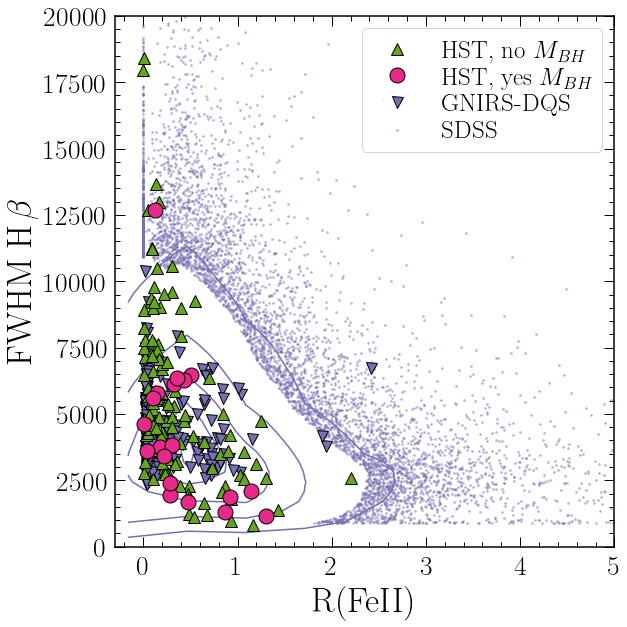

In [16]:
ALPHA_ORIG = 0.25
fig, ax = plt.subplots(1, 1, figsize=(9,9))

### Next block of code plots the HST sample
#plot ICA measurements
ax.plot(RFeII_hst[~maskMBH], Hb_fwhm_hst[~maskMBH], marker="^", markersize=12, 
        markerfacecolor=cs[4], markeredgecolor="k", label="HST, no $M_{BH}$", linestyle="", zorder=3)
ax.plot(RFeII_hst[maskMBH], Hb_fwhm_hst[maskMBH], marker="o", markersize=15, 
        markerfacecolor=cs[3], markeredgecolor="k", label="HST, yes $M_{BH}$", linestyle="", zorder=3)


### Next block of code plots SDSS and GNIRS-DQS objects
#N.B. this block takes a while, so should comment out when testing
plot_contour(RFeII_sdss, Hb_fwhm_sdss, c=cs[2], mark="o", nlevels=[0.05, 0.25, 0.50, 0.75, 0.95], ax=ax, 
             linewidths=1.5, s=3, alpha=0.4, label="SDSS")
#ax.plot(RFeII_sdss, Hb_fwhm_sdss, marker="o", markersize=3, color=cs[2], alpha=0.35, 
#        label="SDSS", linestyle="", zorder=1)

#now GNIRS
ax.plot(RFeII_gnirs, Hb_fwhm_gnirs, marker="v", markersize=11, markerfacecolor=cs[2], markeredgecolor="k", label="GNIRS-DQS", linestyle="", zorder=2)

#plot settings
ax.set_xlabel('R(FeII)', fontsize=35)
ax.set_ylabel(r'FWHM\;H\,$\beta$', fontsize=35)
ax.tick_params(axis='both', which='major', labelsize=27.5)
#ax.legend(frameon=True, labelspacing=0.1, bbox_to_anchor=(1.0,1), prop={"size":20})
ax.legend(frameon=True, labelspacing=0.1, loc="upper right", prop={"size":25})

ax.set_ylim(0, 20000)
ax.set_xlim(-0.3,5)

plt.tight_layout()
plt.savefig("plots/EV1_optical.pdf")
plt.show()